In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC
from tensorflow.keras.optimizers import Adam
import glob
import pathlib

In [2]:
pic_path=pathlib.Path(r"C:\Users\aftha\Deep Learning\opencv\Training")

In [3]:
pic_path

WindowsPath('C:/Users/aftha/Deep Learning/opencv/Training')

In [4]:
male=list(pic_path.glob('male/*'))
female=list(pic_path.glob('female/*'))

In [5]:
a=list(male)

In [6]:
len(a)

23766

In [7]:
pic_dict={'male':male,'female':female}

In [8]:
pic_class={'male':0,'female':1}

In [9]:
x=[]
y=[]

In [10]:
for i in pic_dict:
    pic_path_list=pic_dict[i]
    for path in pic_path_list:
        img=cv2.imread(str(path))
        img=cv2.resize(img,(75,75))
        img=img/255
        x.append(img)
        y.append(pic_class[i])

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
print(x.shape)
print(y.shape)

(47009, 75, 75, 3)
(47009,)


In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy 

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [15]:
model=Sequential()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.add(Conv2D(filters=150,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=100,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=70,kernel_size=(3,3),input_shape=(75,75,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(90,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 150)       4200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 100)       135100    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 100)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 70)        63070     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 70)         0

In [16]:
model.compile(optimizer='adam',loss=SCC(),metrics=['accuracy'])

In [17]:
hist=model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest),callbacks=[callback])

Epoch 1/10
1102/1102 [==============================] - 328s 295ms/step - loss: 0.3007 - accuracy: 0.8607 - val_loss: 0.1891 - val_accuracy: 0.9283
Epoch 2/10
1102/1102 [==============================] - 310s 281ms/step - loss: 0.1617 - accuracy: 0.9402 - val_loss: 0.1546 - val_accuracy: 0.9427
Epoch 3/10
1102/1102 [==============================] - 302s 274ms/step - loss: 0.1380 - accuracy: 0.9492 - val_loss: 0.1477 - val_accuracy: 0.9461
Epoch 4/10
1102/1102 [==============================] - 289s 262ms/step - loss: 0.1223 - accuracy: 0.9560 - val_loss: 0.1465 - val_accuracy: 0.9489
Epoch 5/10
1102/1102 [==============================] - 307s 279ms/step - loss: 0.1140 - accuracy: 0.9598 - val_loss: 0.1364 - val_accuracy: 0.9507
Epoch 6/10
1102/1102 [==============================] - 296s 269ms/step - loss: 0.1021 - accuracy: 0.9639 - val_loss: 0.1319 - val_accuracy: 0.9517
Epoch 7/10
1102/1102 [==============================] - 297s 269ms/step - loss: 0.0938 - accuracy: 0.9662 - val_

In [19]:
his=hist.history

In [20]:
his

{'loss': [0.30069226026535034,
  0.16169676184654236,
  0.13801956176757812,
  0.12233482301235199,
  0.11395718902349472,
  0.10211814939975739,
  0.09375391155481339,
  0.0860271006822586,
  0.0794420912861824,
  0.06972001492977142],
 'accuracy': [0.860732913017273,
  0.9401520490646362,
  0.949171781539917,
  0.9559791088104248,
  0.9598082304000854,
  0.9639493823051453,
  0.9661617875099182,
  0.9689130783081055,
  0.9708134531974792,
  0.974926233291626],
 'val_loss': [0.18905168771743774,
  0.1545618772506714,
  0.14770492911338806,
  0.1464538872241974,
  0.1363680064678192,
  0.13186608254909515,
  0.1317095011472702,
  0.12947751581668854,
  0.13076718151569366,
  0.13777922093868256],
 'val_accuracy': [0.928273618221283,
  0.9426529407501221,
  0.9461414217948914,
  0.9489492177963257,
  0.9506508708000183,
  0.9516718983650208,
  0.95175701379776,
  0.952437698841095,
  0.9506508708000183,
  0.9549051523208618]}

In [21]:
model.save('MFe.h5')

In [22]:
model.evaluate(xtest,ytest)

368/368 [==============================] - 20s 54ms/step - loss: 0.1378 - accuracy: 0.9549


[0.13777922093868256, 0.9549051523208618]

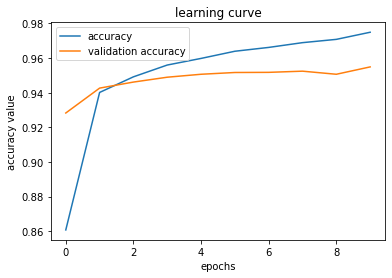

In [23]:
plt.plot(his['accuracy'],label='accuracy')
plt.plot(his['val_accuracy'],label='validation accuracy')
plt.title("learning curve")
plt.xlabel("epochs")
plt.ylabel("accuracy value")
plt.legend()

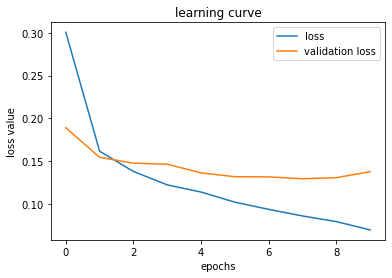

In [24]:
plt.plot(his['loss'],label='loss')
plt.plot(his['val_loss'],label='validation loss')
plt.title('learning curve')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

In [25]:
img=cv2.imread('beautiful-face-png-image.png')
img=cv2.resize(img,(75,75))
img=img.reshape(1,75,75,3)

In [26]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 192ms/step


array([[4.375233e-30, 1.000000e+00]], dtype=float32)

In [27]:
index=np.argmax(pred)
for i,v in pic_class.items():
    if v==index:
        print('prediction=',i)

prediction= female


In [28]:
haar_data=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
cap=cv2.VideoCapture(0)
labels_dict={0:'male',1:'female'}
color_dict={0:(0,255,0),1:(0,0,255)}
while True:
    flag,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=haar_data.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5)
    modl = keras.models.load_model('MFe.h5')
    
    
    for(x,y,w,h) in faces:
        face_img=img[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(75,75))
        normalized=resized/255
        reshaped=np.reshape(normalized,(1,75,75,3))
        result=modl.predict(reshaped)
        label=np.argmax(result,axis=1)[0]
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.putText(img,labels_dict[label],(x+50,y+20),cv2.FONT_HERSHEY_PLAIN,0.9,(0,200,0),2)
    cv2.imshow('live',img)
    
    if cv2.waitKey(20)==27:
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 81ms/step
